/hpc/packages/minerva-centos7/py_packages/3.7/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'subject_id' as categorical
... storing 'tissue' as categorical
... storing 'pid' as categorical
... storing 'cluster' as categorical
... storing 'gct' as categorical


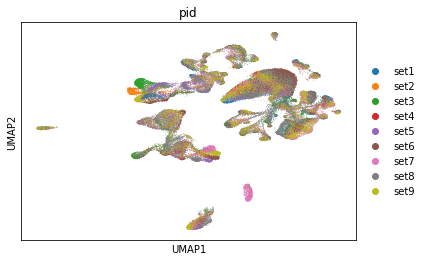

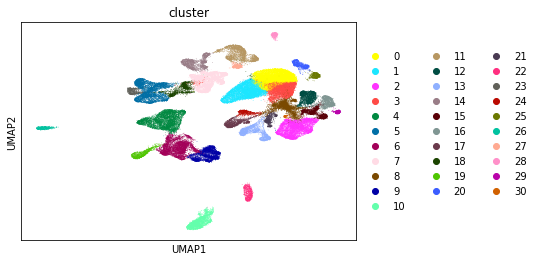

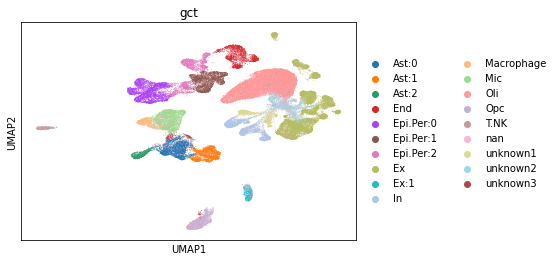

In [1]:
import os
import scipy.sparse as sp_sparse
import scanpy as sc
import numpy as np
from anndata import AnnData
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import harmonypy as hm

def map_ct(b):
    if b in bc2gct:
        return bc2gct[b]
    else:
        return 'nan'


df_tmp = pd.read_csv('[PATH]/meta_data.csv', index_col = 0)
bc2gct = {b:c for b, c in zip(df_tmp.index, df_tmp.gct3)}

folder = './processed_data/merged_data/'
npc = 50

df_pca = pd.read_csv(folder + 'seurat_pca.csv', index_col=0).iloc[:, :20]
df_umap = pd.read_csv(folder + 'seurat_umap_pc%d.csv' % npc, index_col=0)

df_meta = pd.read_csv(folder + 'metadata.csv', index_col = 0)
df_meta = df_meta.loc[df_pca.index]
df_meta = df_meta[['subject_id', 'tissue', 'tissue_id', 'pid']]
df_meta.pid = [str(p) for p in df_meta.pid]
df_cluster = pd.read_csv(folder + 'seurat_clusters_pc%d.csv' % npc, index_col = 0)
df_meta['cluster'] = [str(i) for i in df_cluster.iloc[:, 0].values]
df_meta = df_meta.loc[df_umap.index]
df_meta['gct'] = [map_ct(b) for b in df_meta.index]

data_obj = AnnData(X = df_pca.values, 
                   var = pd.DataFrame([], index = df_pca.columns), 
                   obs = df_meta)

data_obj.obsm['X_umap'] = df_umap.values

sc.pl.umap(data_obj, color = ['pid'])
sc.pl.umap(data_obj, color = ['cluster'])
sc.pl.umap(data_obj, color = ['gct'])

... storing 'subject_id' as categorical
... storing 'tissue' as categorical
... storing 'pid' as categorical
... storing 'cluster' as categorical
... storing 'gct' as categorical


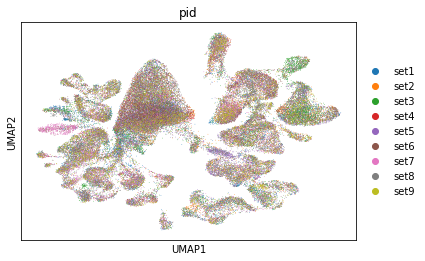

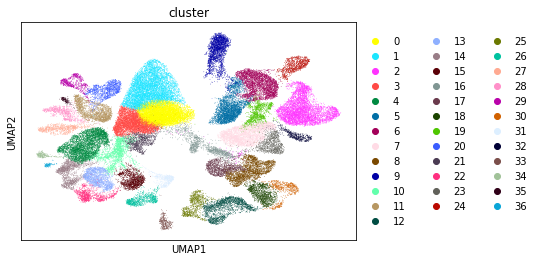

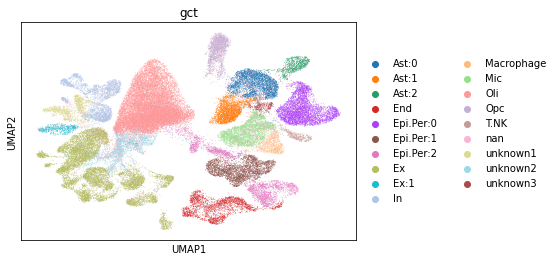

In [2]:
df_tmp = pd.read_csv('[PATH]/meta_data.csv', index_col = 0)
bc2gct = {b:c for b, c in zip(df_tmp.index, df_tmp.gct3)}
df_meta['gct'] = [map_ct(b) for b in df_meta.index]

df_umap = pd.read_csv(folder + 'seurat_umap_harmony%d.csv' % npc, index_col=0)
df_cluster = pd.read_csv(folder + 'seurat_clusters_harmony%d.csv' % npc, index_col = 0)
df_meta['cluster'] = [str(i) for i in df_cluster.iloc[:, 0].values]

data_obj = AnnData(X = df_pca.values, 
                   var = pd.DataFrame([], index = df_pca.columns), 
                   obs = df_meta)

data_obj.obsm['X_umap'] = df_umap.values

sc.pl.umap(data_obj, color = ['pid'])
sc.pl.umap(data_obj, color = ['cluster'])
sc.pl.umap(data_obj, color = ['gct'])

/hpc/packages/minerva-centos7/py_packages/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/hpc/packages/minerva-centos7/py_packages/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/hpc/packages/minerva-centos7/py_packages/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

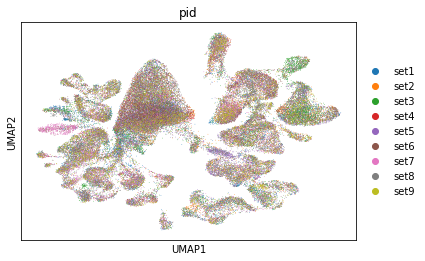

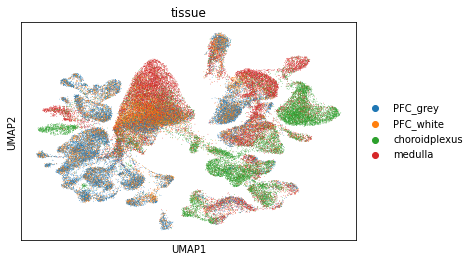

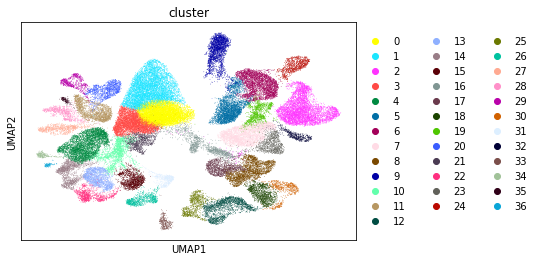

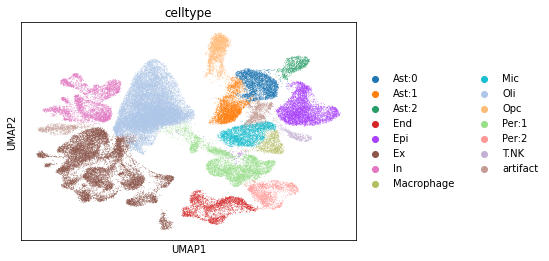

In [3]:
from collections import Counter
cl2ct = {}
for k, item in df_meta.groupby('cluster'):
    cl2ct[k] = Counter(item.gct).most_common(1)[0][0]

cl2ct['19'] = 'artifact'
cl2ct['10'] = 'Ex'
cl2ct['27'] = 'artifact'
cl2ct['28'] = 'In'
cl2ct['21'] = 'Oli'
cl2ct['16'] = 'Epi.Per:1'

df_meta['celltype'] = [cl2ct[c] for c in df_meta.cluster] 
df_meta.celltype[df_meta.celltype == 'Epi.Per:0'] = 'Epi'
df_meta.celltype[df_meta.celltype == 'Epi.Per:1'] = 'Per:1'
df_meta.celltype[df_meta.celltype == 'Epi.Per:2'] = 'Per:2'

    
data_obj = AnnData(X = df_pca.values, 
                   var = pd.DataFrame([], index = df_pca.columns), 
                   obs = df_meta)

data_obj.obsm['X_umap'] = df_umap.values

sc.pl.umap(data_obj, color = ['pid'])
sc.pl.umap(data_obj, color = ['tissue'])
sc.pl.umap(data_obj, color = ['cluster'])
        
sc.pl.umap(data_obj, color = ['celltype'])

In [5]:
df_gene = pd.read_csv(folder + 'gene_expression.csv', index_col = 0)

In [6]:
df_meta_sub = df_meta[df_meta.celltype != 'artifact']

In [7]:
df_gene_sub = df_gene.loc[df_meta_sub.index].copy()

In [8]:
df_gene_sub = df_gene_sub.astype('int')

In [9]:
df_gene_sub.to_csv('processed_data/clean_data/gene_expression.csv')

In [50]:
df_meta_sub[['subject_id', 'tissue', 'tissue_id', 'pid', 'cluster', 'celltype']].to_csv('processed_data/clean_data/metadata.csv')

In [3]:
import pandas as pd

sample_info = pd.read_csv('info/HTO_barcode_info.csv')
subject2clinical = {s:c for s, c in zip(sample_info.subject_id, sample_info.clinical)}

df_meta = pd.read_csv('./processed_data/clean_data/metadata.csv', index_col = 0)
df_meta.pid = ['-'.join(p.split('-')[-2:]) for p in df_meta.index]
pid2subject = {p:s for p, s in zip(df_meta.pid, df_meta.subject_id)}

meta_new = df_meta.copy()

meta_new['pid'] = ['-'.join(p.split('-')[-2:]) for p in meta_new.index]
meta_new['clinical'] = [subject2clinical[s] for s in meta_new.subject_id]
meta_new['is_covid'] = [int(s != 'Ctrl') for s in meta_new.clinical]


In [8]:
assert all(meta_new.subject_id == df_meta.subject_id)
assert all(meta_new.tissue == df_meta.tissue)
assert all(meta_new.tissue_id == df_meta.tissue_id)
assert all(meta_new.celltype == df_meta.celltype)

In [12]:
meta_new.to_csv('./processed_data/clean_data/metadata.csv')

In [1]:
import pandas as pd

sample_info = pd.read_csv('info/HTO_barcode_info.csv')
df_meta = pd.read_csv('./processed_data/clean_data/metadata.csv', index_col = 0)
meta_new = df_meta.copy()
meta_new.tissue = [t.split('_')[0] for t in meta_new.tissue]

In [3]:
meta_new[['tissue', 'tissue_id']].drop_duplicates()

,tissue,tissue_id
AAACCCACAACCCTAA-frozen-COVID-set1-A,medulla,4
AAACCCACATCGGATT-frozen-COVID-set1-A,choroidplexus,6
AAACCCAGTCGTATTG-frozen-COVID-set1-A,medulla,3
AAACCCATCCACTTTA-frozen-COVID-set1-A,choroidplexus,5
AAACGAAAGAACGCGT-frozen-COVID-set1-A,PFC,2
AAACGAATCGTTCATT-frozen-COVID-set1-A,PFC,1


In [4]:
meta_new.to_csv('./processed_data/clean_data/metadata.csv')